# 1. Context 

Usage With Surya OCR

In [24]:
from PIL import Image
import cv2
from surya.recognition import RecognitionPredictor
from surya.detection import DetectionPredictor
from surya.layout import LayoutPredictor

In [15]:
import os
print(os.listdir("../../sample_images/hindi"))

['textbook_digital_hindi_01.png', 'textbook_digital_hindi_02.png', 'legal_digital_hindi_06.png', 'legal_scanned_handwritten_hindi_08.png', 'textbook_digital_hindi_04.png', 'textbook_digital_hindi_03.png', 'book_scanned_hindi_15.png', 'legal_digital_hindi_05.png', 'book_scanned_handwritten_hindi_14.png', 'academic_digital_hindi_11.png', 'academic_scanned_hindi_10.png', 'book_scanned_hindi_09.png', 'book_scanned_hindi_12.png', 'book_handwritten_hindi_13.png', 'legal_digital_hindi_07.png']


In [45]:
file_path = "../../sample_images/hindi/book_scanned_hindi_12.png"
cv_image = cv2.imread(file_path)
cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
image = Image.fromarray(cv_image_rgb)

## 1. OCR (Text Recognition)

In [46]:
recognition_predictor = RecognitionPredictor()
detection_predictor = DetectionPredictor()

In [47]:
predictions = recognition_predictor([image], det_predictor=detection_predictor)

Recognizing Text: 100%|██████████| 29/29 [09:00<00:00, 18.62s/it]


# 2. Layout and reading order

In [48]:
layout_predictor = LayoutPredictor()

# layout_predictions is a list of dicts, one per image
layout_predictions = layout_predictor([image])

Recognizing layout: 100%|██████████| 1/1 [00:19<00:00, 19.71s/it]


In [49]:
prediction = layout_predictions[0]
prediction

LayoutResult(bboxes=[LayoutBox(polygon=[[276.40709191560745, 23.292348861694336], [503.6155259013176, 23.292348861694336], [503.6155259013176, 54.31995169445872], [276.40709191560745, 54.31995169445872]], confidence=0.5992966294288635, label='PageHeader', position=0, top_k={'PageHeader': 0.5992966294288635, 'Text': 0.3995939791202545, 'SectionHeader': 0.0005261642509140074, 'TableOfContents': 0.00021771028696093708, 'Footnote': 0.0001353814877802506}, bbox=[276.40709191560745, 23.292348861694336, 503.6155259013176, 54.31995169445872]), LayoutBox(polygon=[[10.807566404342651, 94.30150540173054], [788.4562899470329, 94.30150540173054], [788.4562899470329, 211.56236793100834], [10.807566404342651, 211.56236793100834]], confidence=0.9999023675918579, label='Text', position=1, top_k={'Text': 0.9999023675918579, 'PageHeader': 5.609836443909444e-05, 'ListItem': 8.808555321593303e-06, 'PageFooter': 7.129631285351934e-06, 'TextInlineMath': 6.709271929139504e-06}, bbox=[10.807566404342651, 94.30

In [57]:
from pprint import pprint
print(type(prediction))
pprint(prediction.dict(), sort_dicts=False)


<class 'surya.layout.schema.LayoutResult'>
{'bboxes': [{'polygon': [[276.40709191560745, 23.292348861694336],
                         [503.6155259013176, 23.292348861694336],
                         [503.6155259013176, 54.31995169445872],
                         [276.40709191560745, 54.31995169445872]],
             'confidence': 0.5992966294288635,
             'label': 'PageHeader',
             'position': 0,
             'top_k': {'PageHeader': 0.5992966294288635,
                       'Text': 0.3995939791202545,
                       'SectionHeader': 0.0005261642509140074,
                       'TableOfContents': 0.00021771028696093708,
                       'Footnote': 0.0001353814877802506},
             'bbox': [276.40709191560745,
                      23.292348861694336,
                      503.6155259013176,
                      54.31995169445872]},
            {'polygon': [[10.807566404342651, 94.30150540173054],
                         [788.4562899470329, 94.301

/tmp/ipykernel_402762/109906678.py:3: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  pprint(prediction.dict(), sort_dicts=False)


In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

color_map = {
    "Title": "red",
    "Text": "green",
    "Figure": "blue",
    "Table": "orange",
    "Caption": "purple"
}


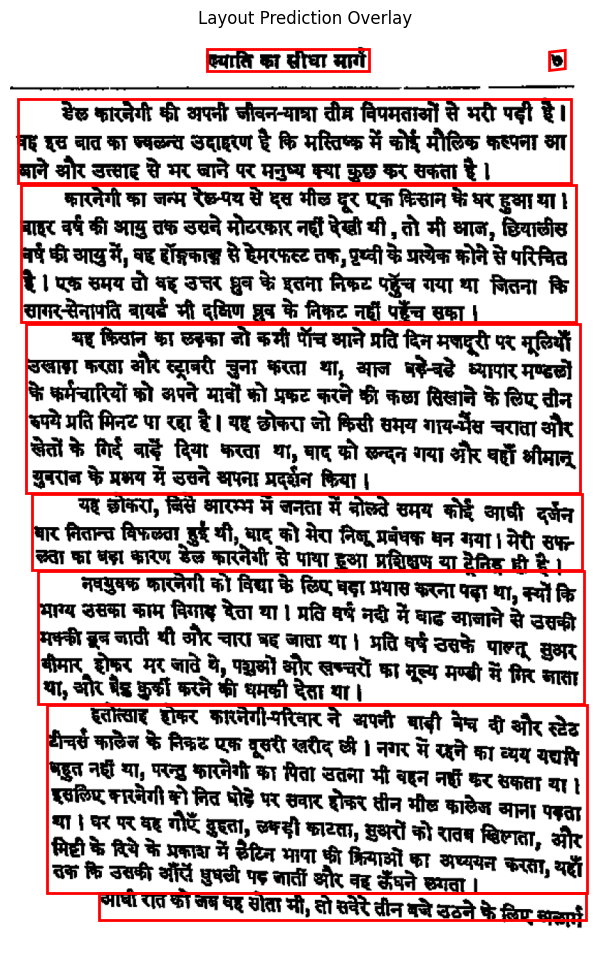

In [85]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def show_image (prediction) :
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(image)

    # Draw layout polygons with labels
    for box in prediction.bboxes:
        polygon = box.polygon  # list of [x, y] points
        poly_patch = Polygon(polygon, closed=True, edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(poly_patch)

        if hasattr(box, "type"):
            label = box.type
            x, y = polygon[0]  # label near first vertex
            ax.text(x, y, label, color='blue', fontsize=12, backgroundcolor='white')

    plt.axis('off')
    plt.title("Layout Prediction Overlay")
    plt.show()

show_image(prediction)

In [ ]:
def print_ocr_text_lines(ocr_result):
    """
    Print all text lines from OCRResult as plain text.
    """
    for line in ocr_result.text_lines:
        print(line.text)


ख्याति का सीधा सागै
डेल कारनेगी की अपनी जीवन-यात्रा तीम विपमताओं से भरी पदी है।
वह इस बात का ब्बळन्त उदाइरण है कि मस्तिष्क में कोई मौलिक करुपना आ
बाने और उत्साह से भर जाने पर मनुष्य क्या कुछ कर सकता है।
.<br>कारनेगी का जन्म रेख्न्पय से दस मील दूर एक किसान के घर हुआ था।
बाइर वर्ष की आयु तक उसने मोटरकार नहीं देखी थी , तो भी आज, छियालीस
नर्ष की आयु में, वह हॉङ्गकाञ्च से देमरफस्ट तक, पृथ्वी के प्रत्येक कोने से परिचित
है। एक समय तो वह उत्तर ध्रुव के इतना निकट पहुॅच गया था जितना कि
सागर-सेनापति वायर्ड भी दक्षिण घ्रुव के निकट नहीं पहुँच सका।
यह फिसान का रुदका जो कमी पॉच आने प्रति दिन मजदूरी पर मूलियों
उखाड़ा करता और स्ट्रानरी चुना करता था, आल बड़े-बड़े ब्यापार मण्डलो
के कर्मचारियों को अपने मार्वों को प्रकट करने की कछा सिखाने के लिए तीन
रुपये प्रति मिनट पा रहा है। यह छोकरा जो किसी समय गाय-मैंस चराता और
सेतों के गिर्द बार्दे दिया करता था, बाद को खन्दन गया और वहाँ श्रीमान्
युवरान के प्रभय में उसने अपना प्रदर्शन किया।
यह छोकरा, चिसे आरम्भ में जनता में बोलते समय कोई आधी दर्जन
बार नितान्त विफलता हु

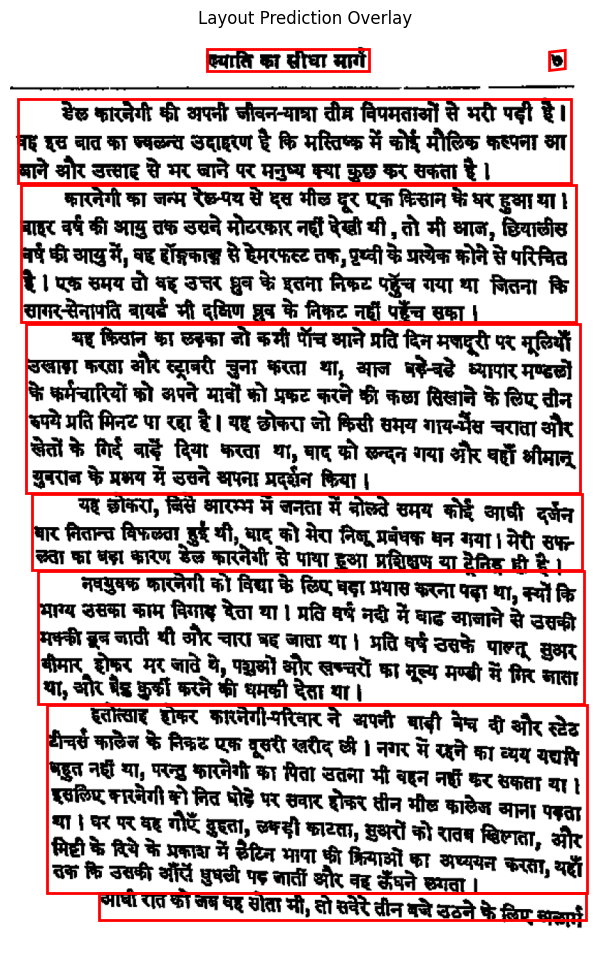

In [86]:
print_ocr_text_lines(predictions[0])
show_image(prediction)


In [72]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

def visualize_ocr_text_only_on_blank_canvas(image, ocr_result):
    
    font_path = "../../fonts/NotoSansDevanagari-Regular.otf"
    font_prop = fm.FontProperties(fname=font_path, size=14)

    # Create blank white canvas
    canvas = np.ones((image.height, image.width, 3), dtype=np.uint8) * 255

    fig, ax = plt.subplots(figsize=(16, 20))
    ax.imshow(canvas)

    # Plot text only
    for line in ocr_result.text_lines:
        x, y = line.polygon[0]
        ax.text(x, y, line.text,
                fontsize=14,
                color='black',
                backgroundcolor='white',
                fontproperties=font_prop)

    ax.axis('off')
    plt.show()


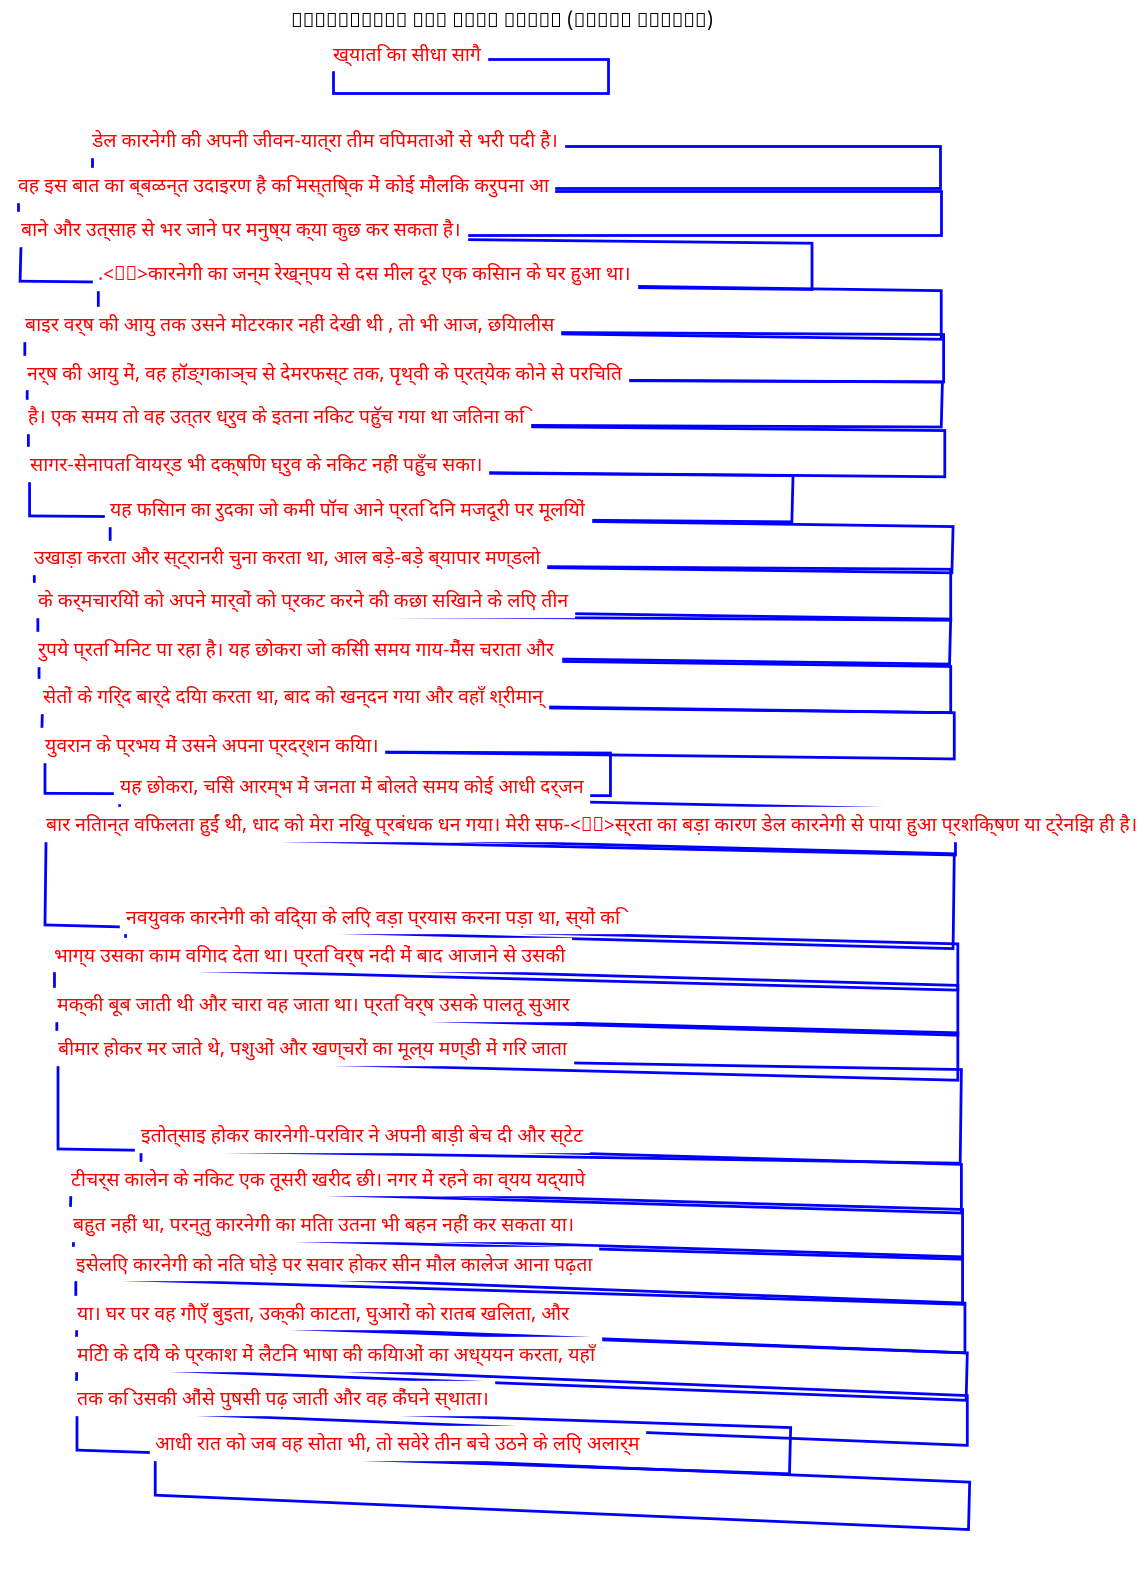

In [74]:
visualize_ocr_on_blank_canvas(image, predictions[0])


In [75]:
from pprint import pprint

# Check the type and keys of the prediction object
print("Type:", type(predictions[0]))
print("Attributes:")
pprint(predictions[0].__dict__)


Type: <class 'surya.recognition.schema.OCRResult'>
Attributes:
{'image_bbox': [0.0, 0.0, 831.0, 1299.0],
 'text_lines': [TextLine(polygon=[[272.0, 21.0], [504.0, 21.0], [504.0, 49.0], [272.0, 49.0]], confidence=0.9519535146261516, text='ख्याति का सीधा सागै', chars=[TextChar(polygon=[[274.0, 21.0], [288.0, 21.0], [288.0, 48.0], [273.0, 48.0]], confidence=0.8947380781173706, text='ख', bbox_valid=True, bbox=[273.0, 21.0, 288.0, 48.0]), TextChar(polygon=[[273.0, 21.0], [291.0, 21.0], [291.0, 48.0], [273.0, 48.0]], confidence=0.9924203753471375, text='्', bbox_valid=True, bbox=[273.0, 21.0, 291.0, 48.0]), TextChar(polygon=[[291.0, 21.0], [316.0, 21.0], [316.0, 48.0], [291.0, 48.0]], confidence=0.973445475101471, text='य', bbox_valid=True, bbox=[291.0, 21.0, 316.0, 48.0]), TextChar(polygon=[[289.0, 21.0], [315.0, 21.0], [315.0, 48.0], [289.0, 48.0]], confidence=0.9889756441116333, text='ा', bbox_valid=True, bbox=[289.0, 21.0, 315.0, 48.0]), TextChar(polygon=[[315.0, 21.0], [340.0, 21.0], [34